In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.style as style
style.use('fast')

In [2]:
apple = pd.read_csv("Apple_new.csv", names=['R','G','B','Class'])
orange = pd.read_csv("Orange_new.csv", names=['R','G','B','Class'])
lemon = pd.read_csv("Lemon_new_2.csv", names=['R','G','B','Class'])
orange.head()

,R,G,B,Class
0,321.57,285.47,295.13,1
1,430.60,370.07,375.50,1
2,430.30,369.67,375.03,1
3,437.53,371.73,375.80,1
4,422.73,363.10,371.00,1


In [3]:
## classes={0: "Apple", 1: "Orange", 2: "Lemon"}
datasets=[apple, orange, lemon]
RGB_cols=['R','G','B']
lemon.head()

,R,G,B,Class
0,1414.90,967.80,862.03,2
1,1414.20,967.73,861.97,2
2,1414.10,967.97,862.20,2
3,1414.70,968.33,862.53,2
4,1415.07,968.60,862.77,2


In [4]:
for dataset in datasets:
    dataset['R_ratio'] = dataset['R']/dataset[RGB_cols].sum(axis=1)
    dataset['G_ratio'] = dataset['G']/dataset[RGB_cols].sum(axis=1)
    dataset['B_ratio'] = dataset['B']/dataset[RGB_cols].sum(axis=1)
apple.head()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
0,746.07,577.13,607.63,0,0.386399,0.298903,0.314699
1,746.67,577.77,608.23,0,0.386341,0.298949,0.314710
2,745.90,576.97,607.87,0,0.386329,0.298834,0.314838
3,746.03,576.80,609.53,0,0.386072,0.298495,0.315433
4,745.63,575.87,610.17,0,0.386003,0.298120,0.315877


In [5]:
print(apple.info(), orange.info(), lemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        108 non-null    float64
 1   G        108 non-null    float64
 2   B        108 non-null    float64
 3   Class    108 non-null    int64  
 4   R_ratio  108 non-null    float64
 5   G_ratio  108 non-null    float64
 6   B_ratio  108 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 6.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R        107 non-null    float64
 1   G        107 non-null    float64
 2   B        107 non-null    float64
 3   Class    107 non-null    int64  
 4   R_ratio  107 non-null    float64
 5   G_ratio  107 non-null    float64
 6   B_ratio  107 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 6.0 KB
<class '

In [6]:
lemon.head()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
0,1414.90,967.80,862.03,2,0.436061,0.298268,0.265671
1,1414.20,967.73,861.97,2,0.435957,0.298323,0.265720
2,1414.10,967.97,862.20,2,0.435876,0.298363,0.265761
3,1414.70,968.33,862.53,2,0.435888,0.298355,0.265757
4,1415.07,968.60,862.77,2,0.435884,0.298358,0.265759


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
apple.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,108.00,108.00,108.00,108.00,108.00,108.00,108.00
mean,771.66,622.84,639.89,0.00,0.38,0.31,0.32
std,134.08,79.70,72.93,0.00,0.02,0.01,0.01
min,535.47,471.13,496.30,0.00,0.34,0.29,0.30
25%,682.12,576.07,594.68,0.00,0.36,0.30,0.31
50%,755.63,595.43,624.92,0.00,0.38,0.31,0.31
75%,822.40,672.92,679.01,0.00,0.39,0.31,0.32
max,1094.13,790.67,798.07,0.00,0.41,0.32,0.33


In [8]:
orange.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,107.00,107.00,107.00,107.00,107.00,107.00,107.00
mean,1214.27,819.49,806.60,1.00,0.41,0.30,0.29
std,640.60,290.14,274.58,0.00,0.05,0.02,0.03
min,321.57,285.47,295.13,1.00,0.34,0.26,0.26
25%,604.18,581.04,599.07,1.00,0.36,0.28,0.28
50%,1226.33,845.03,802.40,1.00,0.42,0.29,0.28
75%,1479.25,939.23,918.85,1.00,0.45,0.32,0.32
max,2311.43,1266.80,1246.80,1.00,0.48,0.33,0.34


In [9]:
lemon.describe()

,R,G,B,Class,R_ratio,G_ratio,B_ratio
count,131.00,131.00,131.00,131.00,131.00,131.00,131.00
mean,1590.47,1096.91,973.49,2.00,0.43,0.30,0.27
std,256.39,132.37,113.91,0.00,0.01,0.01,0.01
min,1175.10,836.17,755.17,2.00,0.41,0.29,0.26
25%,1381.57,1000.92,897.09,2.00,0.42,0.30,0.26
50%,1496.70,1052.23,935.03,2.00,0.44,0.30,0.27
75%,1783.17,1193.95,1063.78,2.00,0.44,0.30,0.27
max,2292.33,1473.90,1296.77,2.00,0.45,0.31,0.28


Text(0.5, 0, 'Lemon')

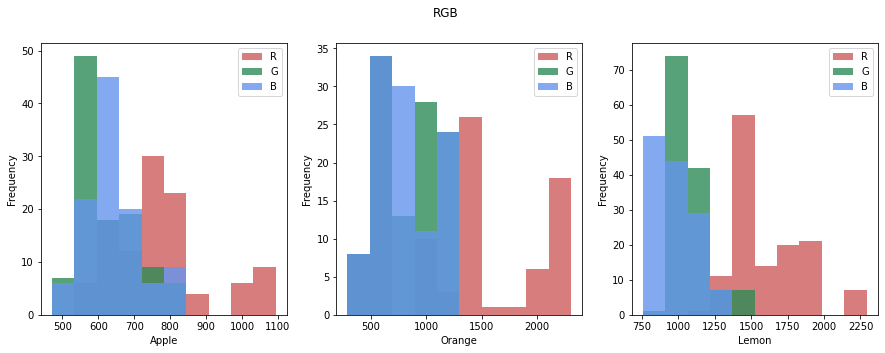

In [10]:
colors = ['indianred','seagreen','cornflowerblue']
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("RGB")
apple[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[0],color=colors)
orange[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[1],color=colors)
lemon[RGB_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[2],color=colors)
axes[0].set_xlabel("Apple")
axes[1].set_xlabel("Orange")
axes[2].set_xlabel("Lemon")

Text(0.5, 0, 'Lemon')

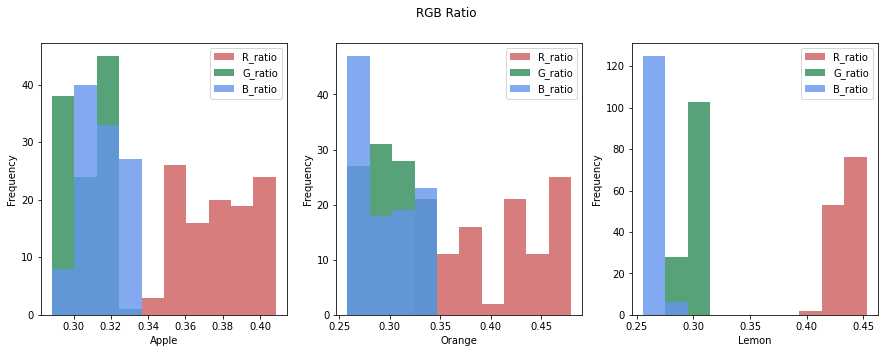

In [11]:
RGB_ratio_cols = ['R_ratio','G_ratio','B_ratio']
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle("RGB Ratio")
apple[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[0],color=colors)
orange[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[1],color=colors)
lemon[RGB_ratio_cols].plot(kind='hist', bins=10, alpha=0.8, ax=axes[2],color=colors)
axes[0].set_xlabel("Apple")
axes[1].set_xlabel("Orange")
axes[2].set_xlabel("Lemon")

Text(0.5, 1.0, 'Lemon')

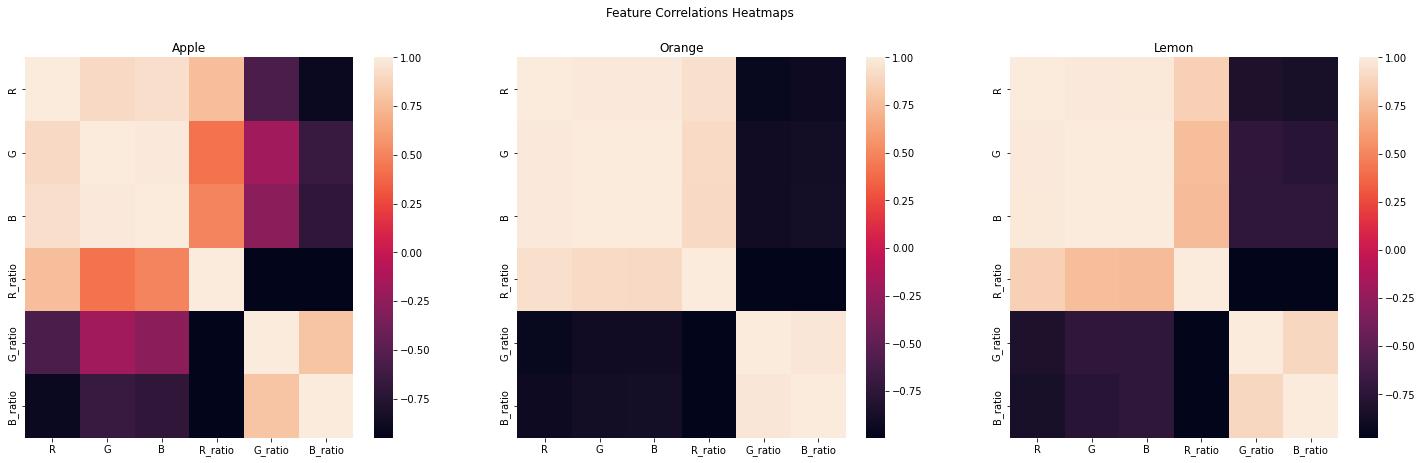

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
fig.suptitle("Feature Correlations Heatmaps")
sns.heatmap(apple.drop("Class", axis=1).corr(), ax=axes[0])
sns.heatmap(orange.drop("Class", axis=1).corr(), ax=axes[1])
sns.heatmap(lemon.drop("Class", axis=1).corr(), ax=axes[2])
axes[0].set_title("Apple")
axes[1].set_title("Orange")
axes[2].set_title("Lemon")

In [49]:
apple_X = apple.drop('Class', axis=1)
apple_y = apple['Class']
orange_X = orange.drop('Class', axis=1)
orange_y = orange['Class']
lemon_X = lemon.drop('Class', axis=1)
lemon_y = lemon['Class']

from sklearn.model_selection import train_test_split
#split into train+val and test
a_X0, a_test_X, a_y0, a_test_y = train_test_split(apple_X, apple_y, test_size=0.15, random_state=7)
o_X0, o_test_X, o_y0, o_test_y = train_test_split(orange_X, orange_y, test_size=0.15, random_state=7)
l_X0, l_test_X, l_y0, l_test_y = train_test_split(lemon_X, lemon_y, test_size=0.15, random_state=7)

#split train+val into train and val
a_X, a_val_X, a_y, a_val_y = train_test_split(a_X0, a_y0, test_size=0.2, random_state=7)
o_X, o_val_X, o_y, o_val_y = train_test_split(o_X0, o_y0, test_size=0.2, random_state=7)
l_X, l_val_X, l_y, l_val_y = train_test_split(l_X0, l_y0, test_size=0.2, random_state=7)

train_X = pd.concat([a_X,o_X,l_X], axis = 0)
train_y = pd.concat([a_y,o_y,l_y], axis = 0)
val_X = pd.concat([a_val_X,o_val_X,l_val_X], axis = 0)
val_y = pd.concat([a_val_y,o_val_y,l_val_y], axis = 0)
test_X = pd.concat([a_test_X,o_test_X,l_test_X], axis = 0)
test_y = pd.concat([a_test_y,o_test_y,l_test_y], axis = 0)

In [50]:
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(232, 6) (232,) (60, 6) (60,) (54, 6) (54,)


In [51]:
from tensorflow import keras
num_classes = 3
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)

tf.random.set_seed(42)

In [53]:
def create_best_DNN(unit):
    """Creates DNN architecture"""
    model = tf.keras.Sequential()
    # Dense all to all
    model.add(tf.keras.layers.Dense(unit, input_shape = [6], activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    #soft max
    model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
    print("created DNN")
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    print("compiled DNN")
    
    return model

DNN = create_best_DNN(18)
DNN.fit(train_X, train_y, epochs=200, batch_size=8, verbose=1, validation_data=(val_X, val_y))
score = DNN.evaluate(val_X, val_y, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

created DNN
compiled DNN
Epoch 1/200
29/29 [==============================] - 1s 7ms/step - loss: 90.9477 - accuracy: 0.3578 - val_loss: 15.1792 - val_accuracy: 0.5667
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 33.6586 - accuracy: 0.3966 - val_loss: 0.5276 - val_accuracy: 0.8333
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 13.2221 - accuracy: 0.5345 - val_loss: 1.2133 - val_accuracy: 0.7667
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 8.5735 - accuracy: 0.5302 - val_loss: 1.5542 - val_accuracy: 0.7833
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 8.6880 - accuracy: 0.5776 - val_loss: 0.8301 - val_accuracy: 0.8000
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 8.1601 - accuracy: 0.5474 - val_loss: 0.4673 - val_accuracy: 0.8000
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 4.6019 - accuracy: 0.5862 - val_loss: 0.5867 - val_a

29/29 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8017 - val_loss: 0.3013 - val_accuracy: 0.8667
Epoch 59/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8103 - val_loss: 0.2542 - val_accuracy: 0.8833
Epoch 60/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8362 - val_loss: 0.2534 - val_accuracy: 0.8833
Epoch 61/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8103 - val_loss: 0.2687 - val_accuracy: 0.8833
Epoch 62/200
29/29 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8103 - val_loss: 0.3137 - val_accuracy: 0.8667
Epoch 63/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8017 - val_loss: 0.2990 - val_accuracy: 0.8000
Epoch 64/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8147 - val_loss: 0.2490 - val_accuracy: 0.8833
Epoch 65/200
29/29 

Epoch 116/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7759 - val_loss: 0.2671 - val_accuracy: 0.8667
Epoch 117/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7457 - val_loss: 0.3834 - val_accuracy: 0.8167
Epoch 118/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7457 - val_loss: 0.3125 - val_accuracy: 0.8833
Epoch 119/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7500 - val_loss: 0.2993 - val_accuracy: 0.8833
Epoch 120/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7716 - val_loss: 0.2854 - val_accuracy: 0.8833
Epoch 121/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7974 - val_loss: 0.2583 - val_accuracy: 0.8833
Epoch 122/200
29/29 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8276 - val_loss: 0.3166 - val_accuracy: 0.8667

29/29 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7974 - val_loss: 0.2399 - val_accuracy: 0.8833
Epoch 174/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8017 - val_loss: 0.2481 - val_accuracy: 0.8833
Epoch 175/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8103 - val_loss: 0.2378 - val_accuracy: 0.8833
Epoch 176/200
29/29 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.6767 - val_loss: 0.6041 - val_accuracy: 0.5167
Epoch 177/200
29/29 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.7155 - val_loss: 0.3642 - val_accuracy: 0.8000
Epoch 178/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8017 - val_loss: 0.3027 - val_accuracy: 0.8833
Epoch 179/200
29/29 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8017 - val_loss: 0.2932 - val_accuracy: 0.8833
Epoch 180/200

In [54]:
predictions = DNN.predict(test_X)
predictions.shape

(54, 3)

In [55]:
pred_probs = pd.DataFrame(predictions, columns = ['0', '1', '2'])
pred_probs.tail()

,0,1,2
49,0.00,0.02,0.98
50,0.00,0.00,1.00
51,0.00,0.00,1.00
52,0.00,0.01,0.99
53,0.00,0.02,0.98


In [56]:
test_X.reset_index(inplace=True, drop=True)
test_y.reset_index(inplace=True, drop=True)

class_preds = np.argmax(predictions, axis=1)
classes = pd.DataFrame(class_preds, columns = ["Predicted Class"])

final_preds = pd.concat([test_X, pred_probs, classes, test_y], axis=1, ignore_index=False)
final_preds.head(56)

,R,G,B,R_ratio,G_ratio,B_ratio,0,1,2,Predicted Class,Class
0,973.13,757.37,757.43,0.39,0.30,0.30,0.87,0.13,0.00,0,0
1,637.73,561.40,580.90,0.36,0.32,0.33,0.81,0.19,0.00,0,0
2,826.33,676.90,684.77,0.38,0.31,0.31,0.83,0.17,0.00,0,0
3,670.23,589.87,608.50,0.36,0.32,0.33,0.80,0.20,0.00,0,0
4,1082.23,787.73,794.03,0.41,0.30,0.30,0.86,0.13,0.01,0,0
5,1094.13,790.67,798.07,0.41,0.29,0.30,0.86,0.13,0.01,0,0
6,861.83,690.47,702.30,0.38,0.31,0.31,0.88,0.12,0.00,0,0
7,664.17,592.03,606.70,0.36,0.32,0.33,0.76,0.24,0.00,0,0
8,741.03,532.67,565.83,0.40,0.29,0.31,0.97,0.03,0.00,0,0
9,975.80,758.70,759.47,0.39,0.30,0.30,0.87,0.12,0.00,0,0


In [57]:
from sklearn.metrics import confusion_matrix
y_true = final_preds['Class']
y_pred = final_preds['Predicted Class']
matrix = confusion_matrix(y_true, y_pred, normalize='true')

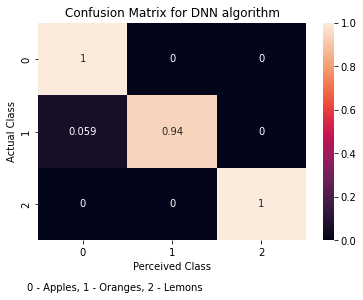

In [58]:
fig = plt.figure()
sns.heatmap(matrix, annot=True)
plt.xlabel('Perceived Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for DNN algorithm')

plt.figtext(0.1, -0.05,'0 - Apples, 1 - Oranges, 2 - Lemons');
plt.show()
fig.savefig('DNN-Confusion.png')